In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Source')

In [23]:
df['year_quater'] = df['Year'].dt.year.astype(str) + ",Q" + df['Year'].dt.quarter.astype(str)

revenue_cost = df.groupby('year_quater').agg(
    Revenue=('Revenue','sum'),
    Cost=('Cost of Sales','sum')
)

revenue_cost.head()

,Revenue,Cost
year_quater,,
"2020,Q1",121741,23029
"2020,Q2",124336,29012
"2020,Q3",136096,28931
"2020,Q4",149889,43692
"2021,Q1",171464,71860


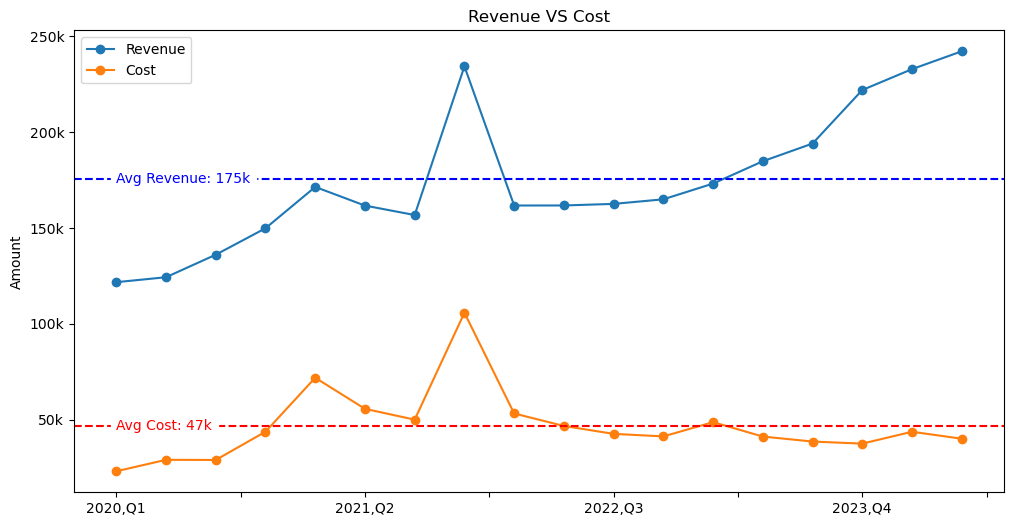

In [27]:
revenue_cost.plot(kind='line',figsize=(12,6),marker='o')

plt.title('Revenue VS Cost')
plt.ylabel('Amount')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))

avg_revenue = revenue_cost['Revenue'].mean()
avg_cost = revenue_cost['Cost'].mean()

plt.axhline(avg_revenue, color='blue', linestyle='--', linewidth=1.5, label=f'Avg Revenue: {avg_revenue/1000:.0f}k')
plt.axhline(avg_cost, color='red', linestyle='--', linewidth=1.5, label=f'Avg Cost: {avg_cost/1000:.0f}k')

# Add text labels at the beginning of the reference lines
plt.text(0, avg_revenue, f'Avg Revenue: {avg_revenue/1000:.0f}k', color='blue', va='center', ha='left', backgroundcolor='white')
plt.text(0, avg_cost, f'Avg Cost: {avg_cost/1000:.0f}k', color='red', va='center', ha='left', backgroundcolor='white')

plt.show()